<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/ARIMA_RANDOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PACKAGES INSTALLING*

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 15.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


*IMPORT PACKAES*

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

*DATA LOADING*

In [51]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

*GROUPING THE DATA AND FILLING THE EMPTY VALUES BY MEDIAN*

In [52]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


*HERE THE PLOT*

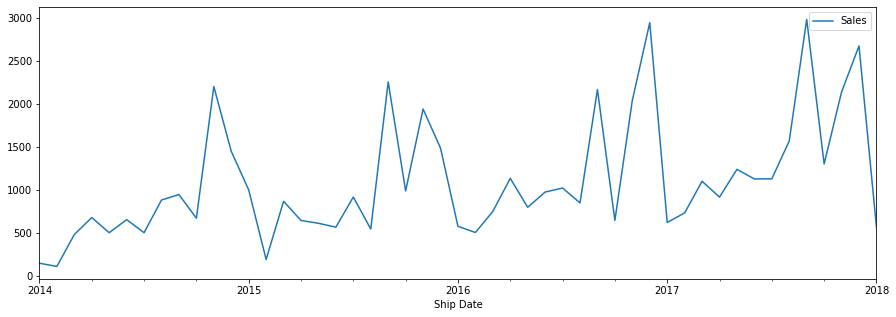

In [53]:
data1.plot(figsize=(15,5))
plt.show()

*INTIALING THE HYPER PARAMETERS*

In [58]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [59]:
seasons = 12
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

*APPLYING RANDOM SEARCH TO FIND BETTER HYPERPARAMETERS*

In [61]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
#we'll search for 25 iterations
max_iter=25
for _ in range(max_iter):
  index_pdq=np.random.randint(low=0,high=len(pdq))
  index_spdq=np.random.randint(low=0,high=len(seasonal_pdq))
  param=pdq[index_pdq]
  sparam=seasonal_pdq[index_spdq]
  try:
    model = sm.tsa.statespace.SARIMAX(data1, order=param, seasonal_order=sparam, enforce_stationarity=False)
    predictions = model.fit()
    print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
    if(predictions.aic < min_AIC):
      min_pdq = param
      min_spdq = sparam
      min_AIC = predictions.aic
  except Exception as e:
    print(e)
    continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 515.3645787995317
Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 515.3645787995317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model=(1, 1, 1)X(0, 0, 1, 12). AIC= 535.6583616655267
Model=(0, 1, 1)X(1, 1, 0, 12). AIC= 358.2163849793523


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model=(1, 1, 1)X(0, 0, 1, 12). AIC= 535.6583616655267
Model=(0, 1, 1)X(1, 1, 0, 12). AIC= 358.2163849793523
Model=(1, 1, 1)X(1, 0, 1, 12). AIC= 515.0815125333386
Model=(1, 1, 1)X(1, 0, 0, 12). AIC= 532.145619705319
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 770.5776330197896
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 563.2408438634151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model=(0, 0, 0)X(0, 1, 1, 12). AIC= nan
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 567.0522968796655
maxlag should be < nobs
Model=(1, 1, 0)X(1, 0, 1, 12). AIC= 540.5593852515389
Model=(1, 0, 1)X(0, 1, 1, 12). AIC= 346.66852201463945
Model=(1, 0, 1)X(0, 0, 1, 12). AIC= 548.2246966129934


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 563.2408438634151
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 380.77810747416595
Model=(1, 0, 0)X(0, 1, 1, 12). AIC= 365.75777451714504
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 563.2408438634151
Model=(1, 1, 0)X(0, 1, 0, 12). AIC= 540.7959104290974
Model=(1, 1, 1)X(0, 0, 0, 12). AIC= 737.4023289327201
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 562.6062307640997
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 567.0522968796655
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 527.1505276449396
**** Smallest PDQ,SPDQ is *****
346.66852201463945
(1, 0, 1)
(0, 1, 1, 12)


*HERE THE MODEL BULIDING AND FITTING*

In [62]:
model = sm.tsa.statespace.SARIMAX(data1, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   49
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -169.334
Date:                            Wed, 08 Jun 2022   AIC                            346.669
Time:                                    05:33:35   BIC                            351.210
Sample:                                01-01-2014   HQIC                           347.811
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0091      0.035     28.607      0.000       0.940       1.078
ma.L1         -0.9998      0.210     -4.771      0.000      -1.411      -0.589
ma.S.L12      -0.2973      0.322     -0.923      0.356      -0.929       0.334
sigma2      1.363e+05   1.54e-06   8.87e+10      0.000    1.36e+05    1.36e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                14.63
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             1.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.54e+26. Standard errors may be unstable.
"""

*HERE THE PREDICTIONS*

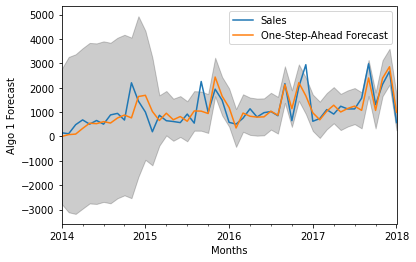

In [64]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1['2014':].plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()